
Import the dependencies


In [90]:
#libraries
import streamlit as st
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler


# EXPLORING DATA

In [91]:
#load the used dataset
data_frame = pd.read_csv('data_set.csv')

In [92]:
# display (rows,columns)
data_frame.shape

(2000, 15)

In [93]:
data_frame.head()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0


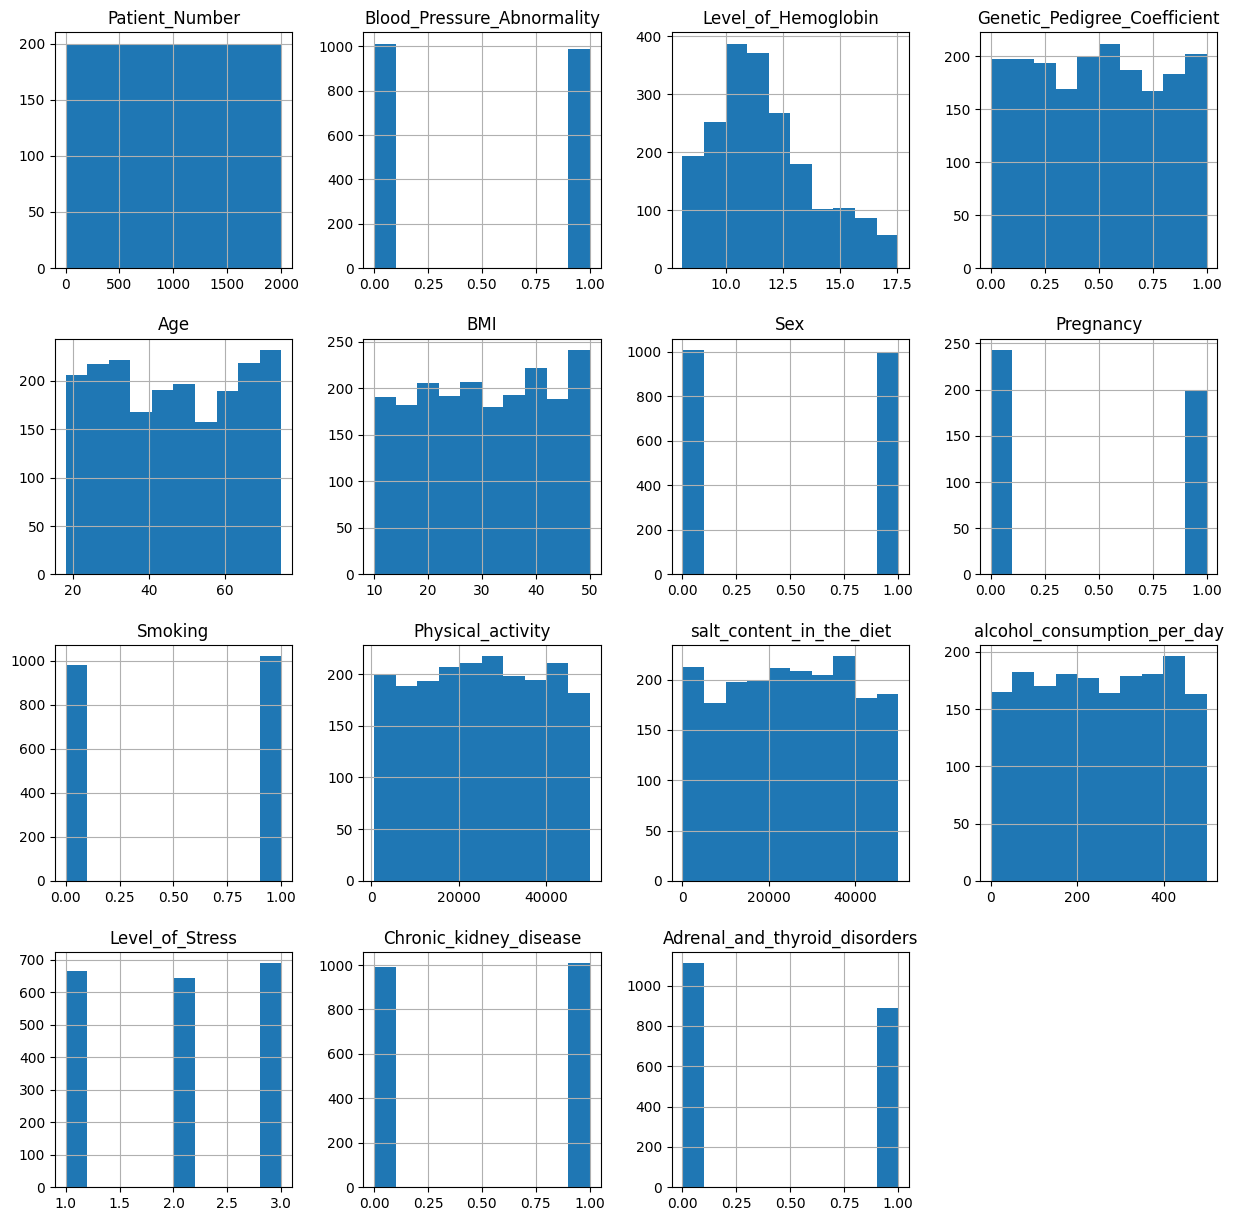

In [94]:
plt.rcParams['figure.figsize'] = [15, 15]
data_frame.hist()
plt.show()

C:\Users\biruni\AppData\Local\Temp\ipykernel_17432\421118097.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_frame['Level_of_Hemoglobin'], kde_kws={"shade":True}, color='red',hist=False)
c:\Users\biruni\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


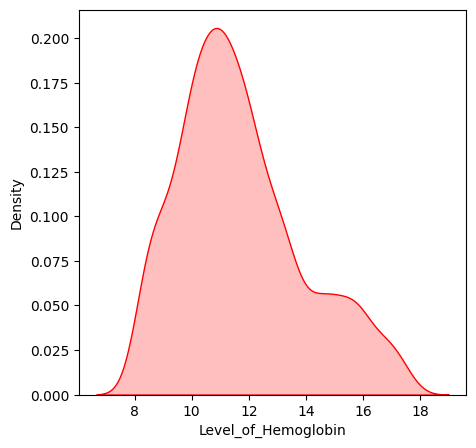

In [95]:
plt.rcParams['figure.figsize'] = [5, 5]
sns.distplot(data_frame['Level_of_Hemoglobin'], kde_kws={"shade":True}, color='red',hist=False)
plt.show()

In [96]:
# detect the outliers using boxplot
# Visualizing dataset and also checking for outliers 
def PLOTBOXPLOT():
    fig, ax = plt.subplots(ncols = 5, nrows = 3, figsize = (20, 15))
    index = 0

    ax = ax.flatten()
    for col, value in data_frame.items():
        sns.boxplot(y=col, data=data_frame, ax=ax[index])
        index += 1

    plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad=5.0)

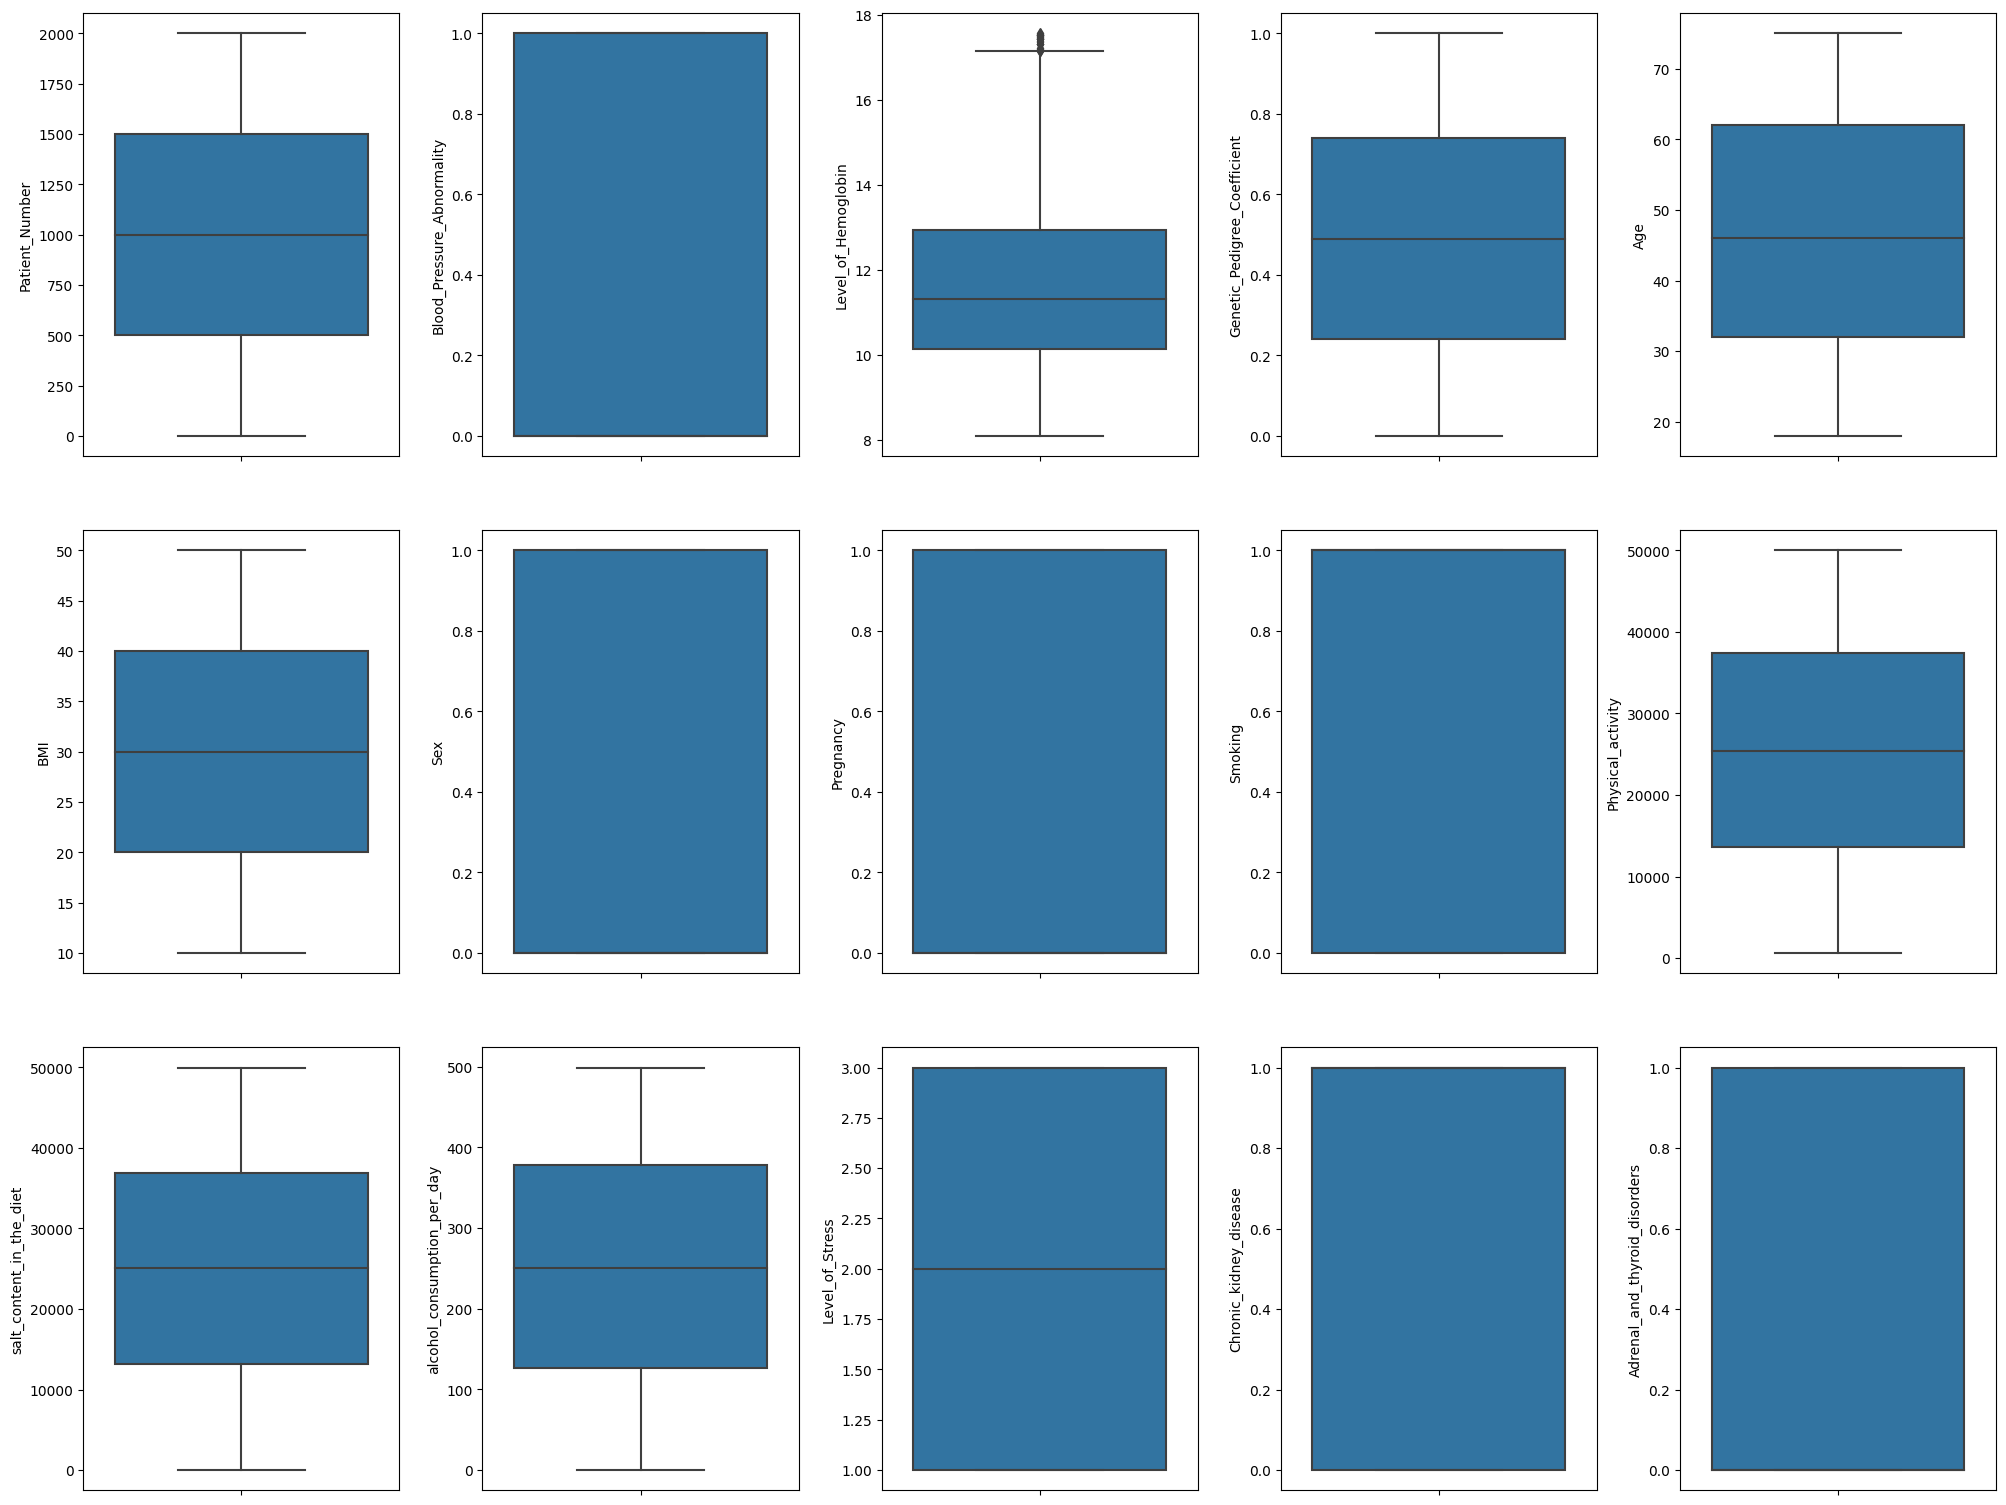

In [97]:
PLOTBOXPLOT()

In [98]:
def Remove_Outlier_Indices(data_frame):
    Q1 = data_frame.quantile(0.25)
    Q3 = data_frame.quantile(0.75)
    IQR = Q3 - Q1
    trueList = (data_frame > (Q1 - 1.5 * IQR)) & (data_frame < (Q3 + 1.5 * IQR))
    return trueList

In [99]:
for _ in range(5):
    noneoutlayerList = Remove_Outlier_Indices(data_frame)
    data_frame = data_frame[noneoutlayerList]

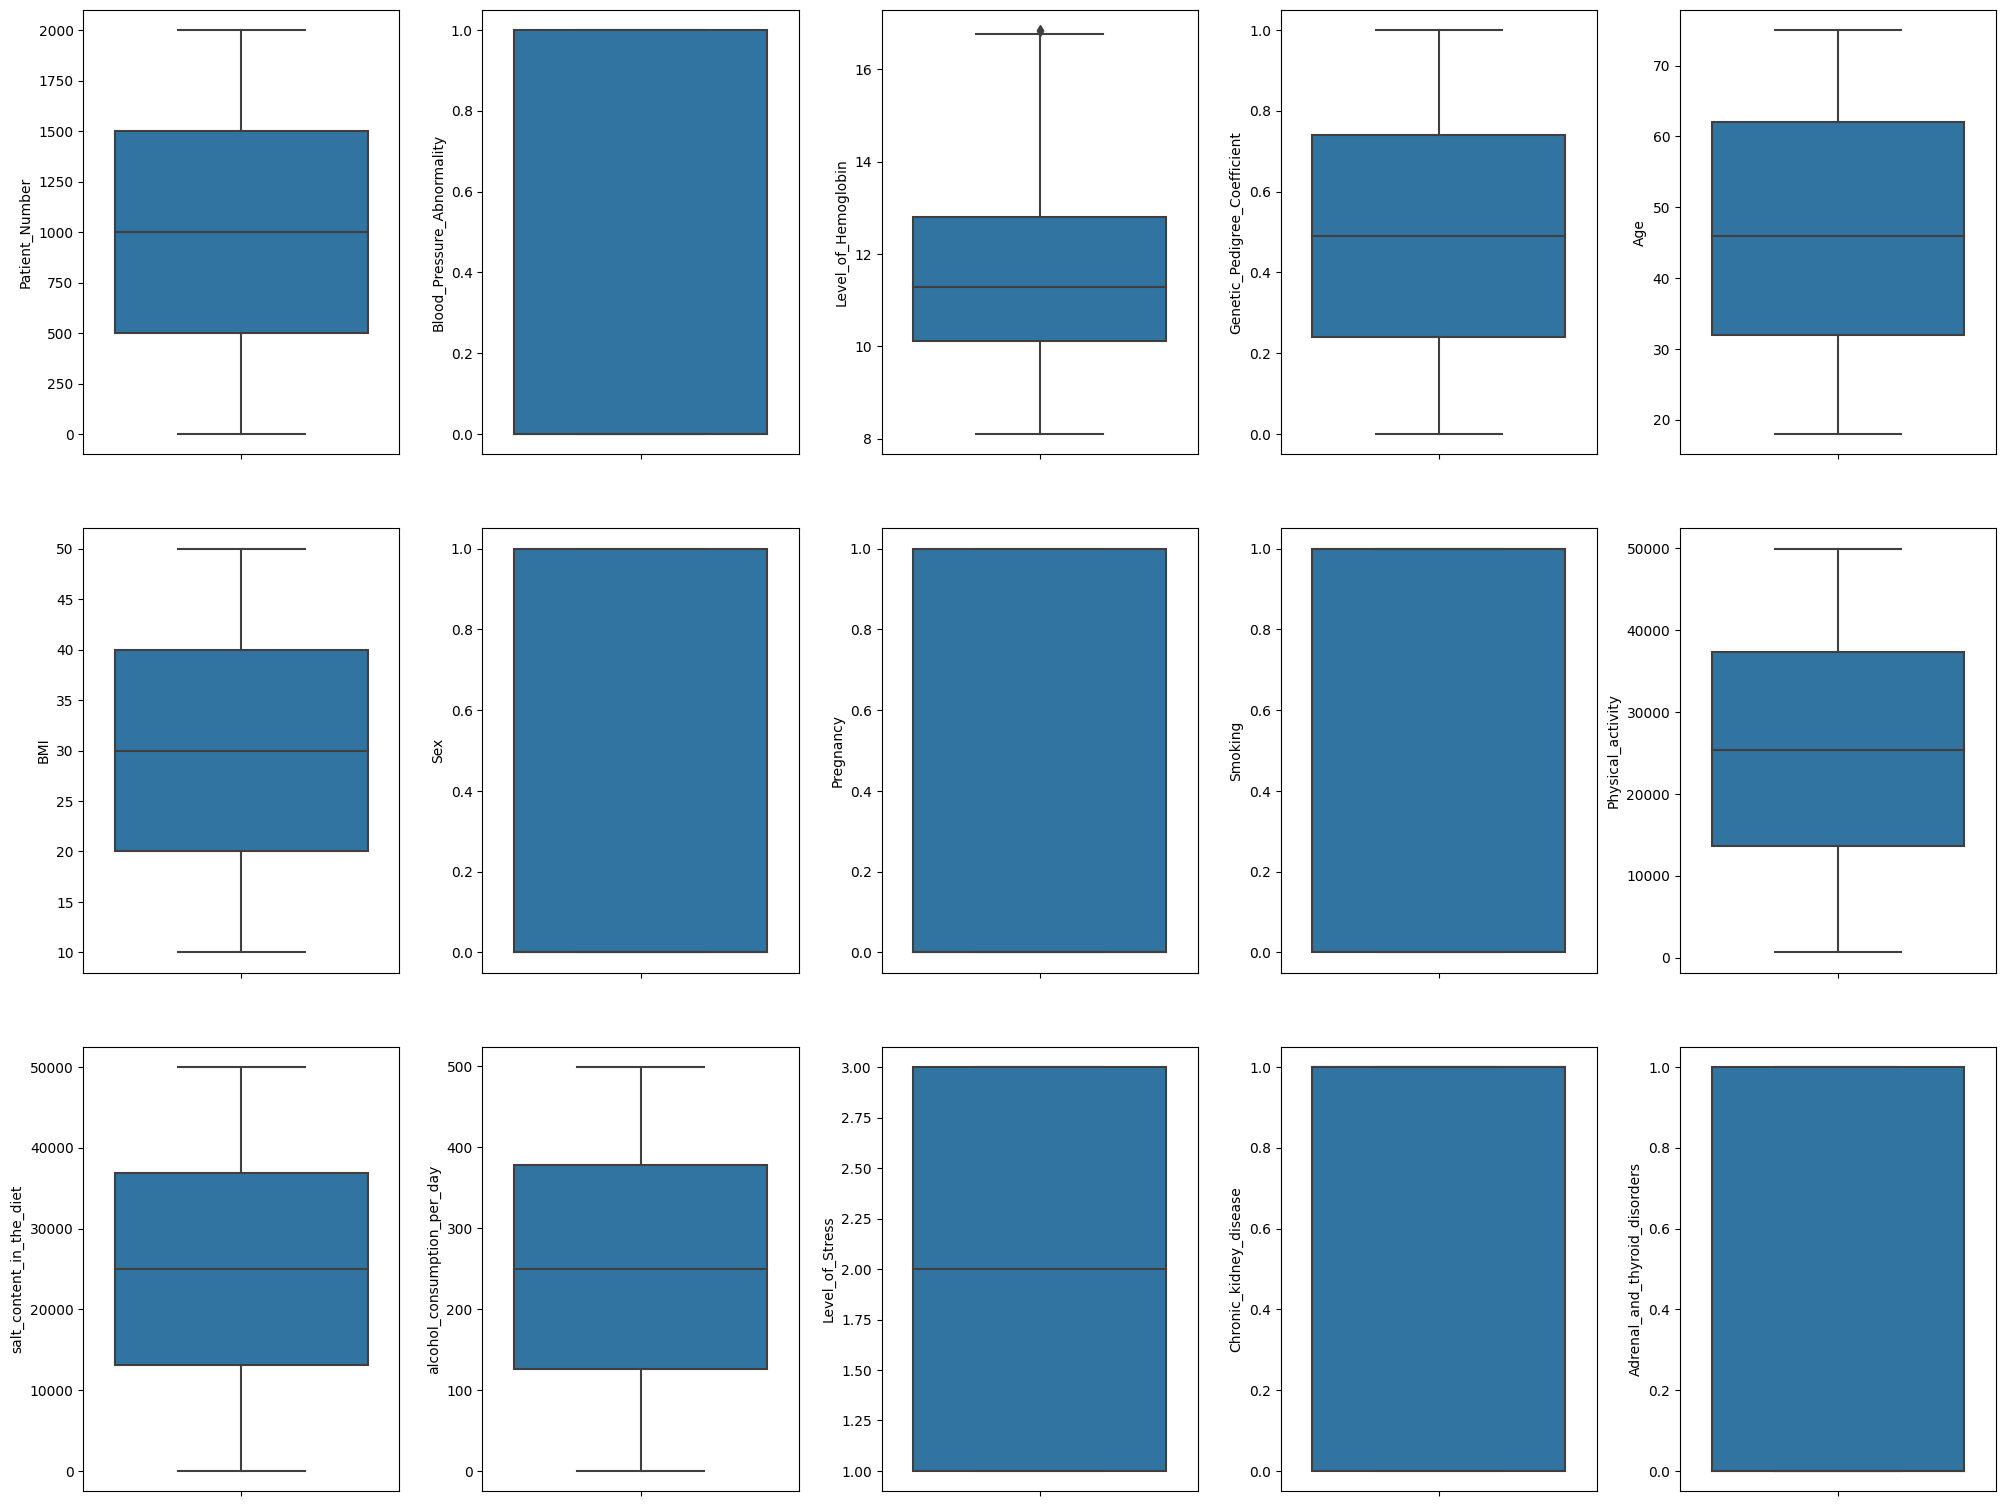

In [100]:
PLOTBOXPLOT()

In [101]:
#drop the unneeded columns
#we will remove the 'Patient_Number' column 
#we will remove the 'pregnancy' column bec. it consist of 1558 nulls and its not that important
#but we wont remove 'Genetic_Pedigree_Coefficient' and 'alcohol_consumption_per_day' columns bec. they are a main factor in the blood pressure disease
data_frame = data_frame.drop(['Patient_Number', 'Pregnancy'], axis=1 )
data_frame.shape

(2000, 13)

<Axes: >

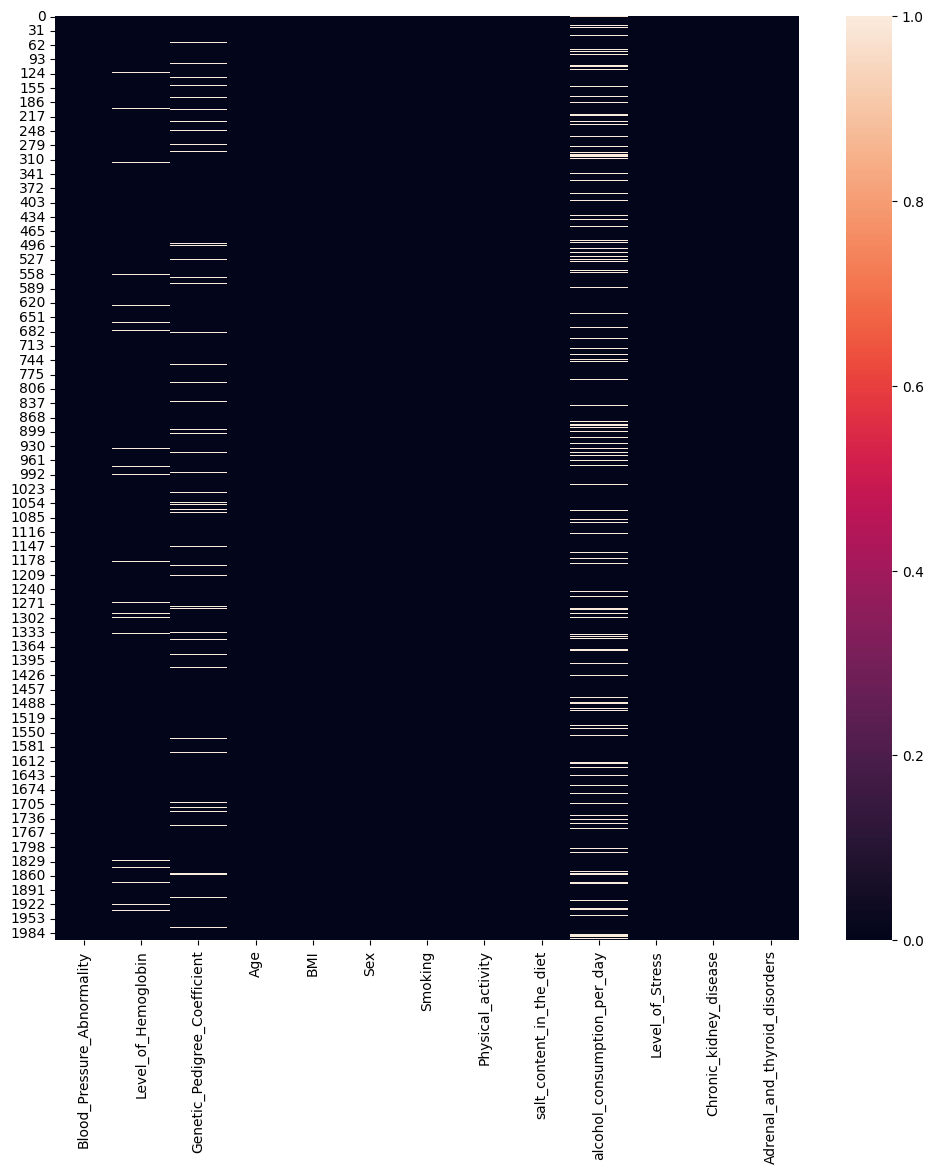

In [102]:
plt.figure(figsize=(12, 12))
sns.heatmap(data_frame.isnull())

In [103]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Blood_Pressure_Abnormality     2000 non-null   int64  
 1   Level_of_Hemoglobin            1957 non-null   float64
 2   Genetic_Pedigree_Coefficient   1908 non-null   float64
 3   Age                            2000 non-null   int64  
 4   BMI                            2000 non-null   int64  
 5   Sex                            2000 non-null   int64  
 6   Smoking                        2000 non-null   int64  
 7   Physical_activity              2000 non-null   int64  
 8   salt_content_in_the_diet       2000 non-null   int64  
 9   alcohol_consumption_per_day    1758 non-null   float64
 10  Level_of_Stress                2000 non-null   int64  
 11  Chronic_kidney_disease         2000 non-null   int64  
 12  Adrenal_and_thyroid_disorders  2000 non-null   i

In [104]:
# show dataset info
data_frame = data_frame.dropna()

Drop the unnecessary columns and rows

In [105]:
data_frame.describe()

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
count,1644.000000,1644.000000,1644.000000,1644.000000,1644.000000,1644.000000,1644.000000,1644.000000,1644.000000,1644.000000,1644.000000,1644.000000,1644.000000
mean,0.477494,11.510973,0.492549,50.185523,30.045620,0.512165,0.510341,25212.868005,24612.655109,249.466545,2.019465,0.496959,0.436740
std,0.499645,2.000474,0.290830,15.061093,11.884245,0.500004,0.500045,14003.339360,14278.332062,143.047850,0.823194,0.500143,0.496133
min,0.000000,8.100000,0.000000,25.000000,10.000000,0.000000,0.000000,628.000000,22.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,10.087500,0.240000,37.000000,20.000000,0.000000,0.000000,13605.750000,12214.750000,126.000000,1.000000,0.000000,0.000000
50%,0.000000,11.220000,0.490000,50.000000,30.000000,1.000000,1.000000,25226.500000,24791.500000,250.000000,2.000000,0.000000,0.000000
75%,1.000000,12.662500,0.740000,64.000000,40.000000,1.000000,1.000000,37480.250000,36750.250000,373.250000,3.000000,1.000000,1.000000
max,1.000000,16.850000,1.000000,75.000000,50.000000,1.000000,1.000000,49940.000000,49976.000000,499.000000,3.000000,1.000000,1.000000


<Axes: >

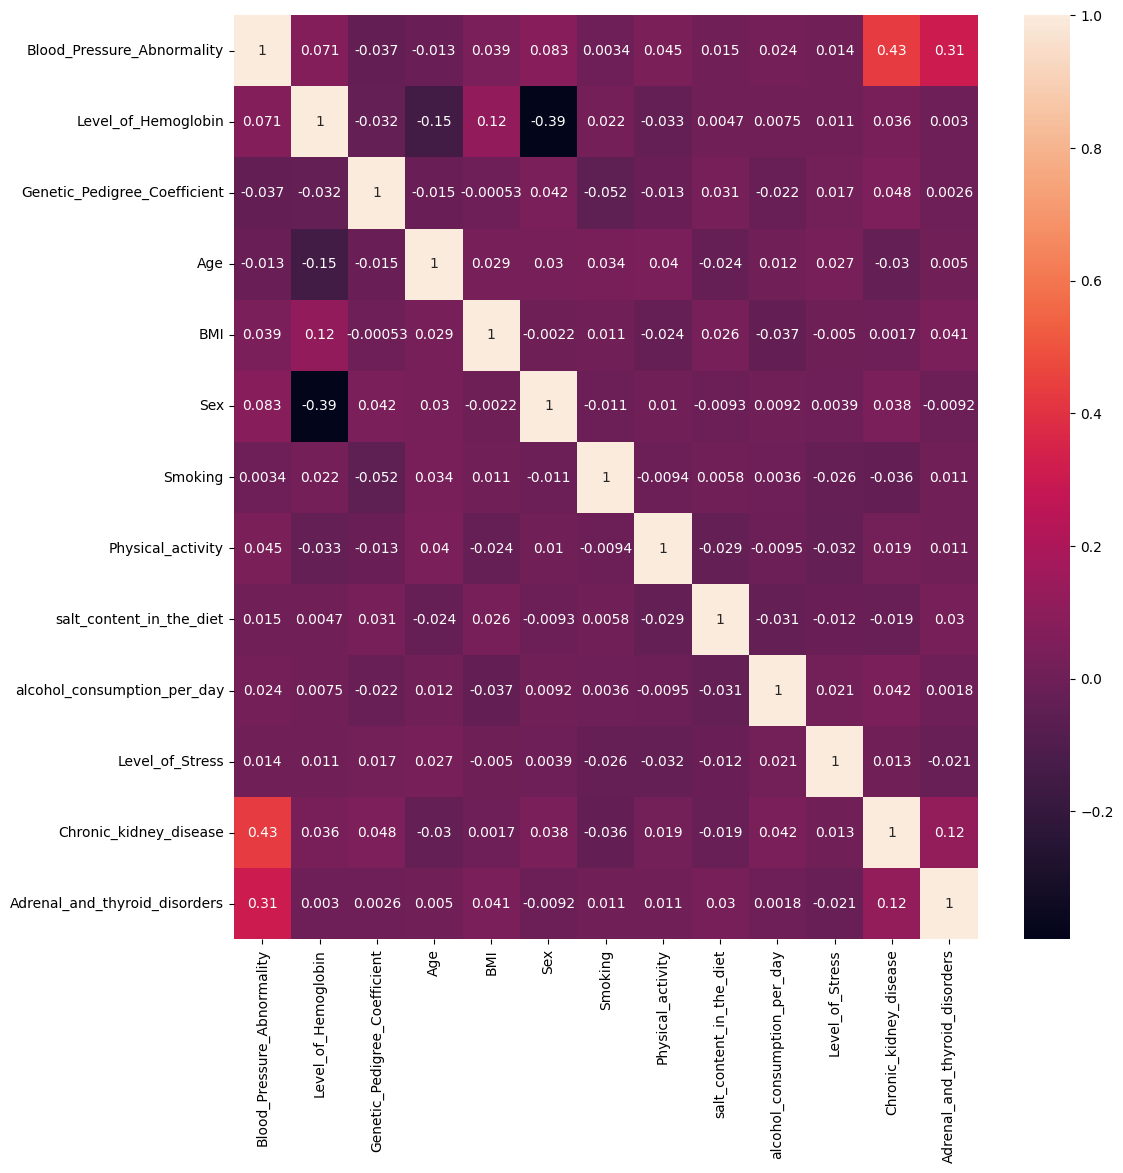

In [106]:
plt.figure(figsize=(12, 12))
sns.heatmap(data_frame.corr(), annot= True)

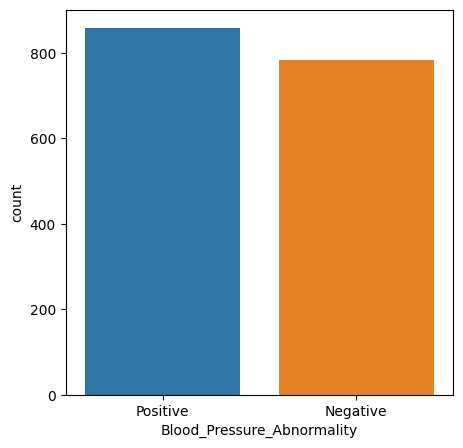

In [107]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x = "Blood_Pressure_Abnormality",data= data_frame, saturation=0.8)
plt.xticks(ticks=[0, 1], labels = ["Positive", "Negative"])
plt.show()

In [108]:
scaler = MinMaxScaler()
names = data_frame.columns
d = scaler.fit_transform(data_frame)
data_frame = pd.DataFrame(d, columns=names)

In [109]:
data_frame.head()

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,0.0,0.188571,0.23,0.58,0.575,1.0,0.0,0.516669,0.506686,0.410822,1.0,0.0,0.0
1,1.0,0.307429,0.91,0.90,0.975,0.0,0.0,0.189954,0.589402,0.134269,0.5,1.0,0.0
2,0.0,0.331429,0.43,0.92,1.000,0.0,0.0,0.202932,0.148477,0.484970,0.0,1.0,0.0
3,1.0,0.693714,0.83,0.54,0.225,0.0,0.0,0.304003,0.993354,0.795591,0.5,0.0,0.0
4,1.0,0.410286,0.75,0.36,0.775,1.0,0.0,0.765351,0.659507,0.412826,1.0,1.0,1.0


In [110]:
# Since the range of values of raw data varies widely
# Normalize the range of independent variables or features of data 
# feature scaling can be done by Standardization or normalization

# dataset before feature scaling:
data_frame.head()

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,0.0,0.188571,0.23,0.58,0.575,1.0,0.0,0.516669,0.506686,0.410822,1.0,0.0,0.0
1,1.0,0.307429,0.91,0.90,0.975,0.0,0.0,0.189954,0.589402,0.134269,0.5,1.0,0.0
2,0.0,0.331429,0.43,0.92,1.000,0.0,0.0,0.202932,0.148477,0.484970,0.0,1.0,0.0
3,1.0,0.693714,0.83,0.54,0.225,0.0,0.0,0.304003,0.993354,0.795591,0.5,0.0,0.0
4,1.0,0.410286,0.75,0.36,0.775,1.0,0.0,0.765351,0.659507,0.412826,1.0,1.0,1.0


In [111]:
data_input = data_frame.drop(columns=['Blood_Pressure_Abnormality'])
data_output = data_frame['Blood_Pressure_Abnormality']

In [112]:
#from sklearn.model_selection import train_test_split

X , X_test , y , y_test =train_test_split(
    data_input , data_output , test_size=0.33 , random_state=0
)

X_train ,X_val ,y_train , y_val =train_test_split (
    data_input ,data_output ,test_size=0.33 ,random_state=0 
)

In [113]:
print(X_train.shape)
print(y_train.shape)
print('---------------')
print(X_val.shape)
print(y_val.shape)
print('---------------')
print(X_test.shape)
print(y_test.shape)
print('---------------')

#(no. of samples , no. of inputs )
#(no. of samples , no. of outputs )

(1101, 12)
(1101,)
---------------
(543, 12)
(543,)
---------------
(543, 12)
(543,)
---------------


### MODEL

In [114]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [115]:


model_svm = SVC(kernel='rbf', random_state = 42)
model_svm.fit(X_train, y_train)


SVC(random_state=42)

0.7532228360957642


<Axes: >

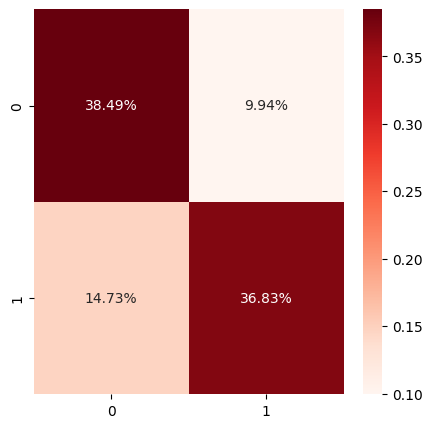

In [116]:

SVC(random_state=42)

# Making Prediction
pred_svm = model_svm.predict(X_test)

# Calculating Accuracy Score
sv = accuracy_score(y_test, pred_svm)
print(sv)
# confusion Maxtrix
cm1 = confusion_matrix(y_test, pred_svm)
sns.heatmap(cm1/np.sum(cm1), annot = True, fmt=  '0.2%', cmap = 'Reds')

0.714548802946593
              precision    recall  f1-score   support

         0.0       0.69      0.75      0.72       263
         1.0       0.74      0.69      0.71       280

    accuracy                           0.71       543
   macro avg       0.72      0.72      0.71       543
weighted avg       0.72      0.71      0.71       543



<Axes: >

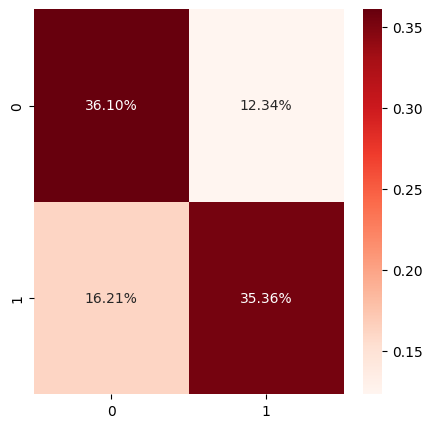

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Creating model object
model_lg = LogisticRegression(max_iter=120,random_state=0, n_jobs=20)

# Training Model
model_lg.fit(X_train, y_train)
LogisticRegression(max_iter=120, n_jobs=20, random_state=0)

# Making Prediction
pred_lg = model_lg.predict(X_test)

# Calculating Accuracy Score
lg = accuracy_score(y_test, pred_lg)
print(lg)
print(classification_report(y_test,pred_lg))
        
# confusion Maxtrix
cm2 = confusion_matrix(y_test, pred_lg)
sns.heatmap(cm2/np.sum(cm2), annot = True, fmt=  '0.2%', cmap = 'Reds')


0.7458563535911602
              precision    recall  f1-score   support

         0.0       0.70      0.84      0.76       263
         1.0       0.81      0.66      0.73       280

    accuracy                           0.75       543
   macro avg       0.76      0.75      0.74       543
weighted avg       0.76      0.75      0.74       543



<Axes: >

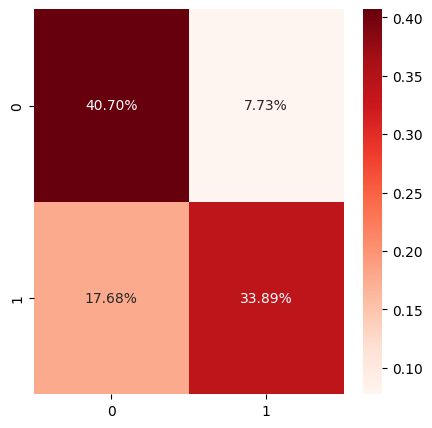

In [118]:
from sklearn.ensemble import RandomForestClassifier
# Creating model object
model_rf = RandomForestClassifier(n_estimators=300,min_samples_leaf=0.16, random_state=42)
# Training Model
model_rf.fit(X_train, y_train)
RandomForestClassifier(min_samples_leaf=0.16, n_estimators=300, random_state=42)

# Making Prediction
pred_rf = model_rf.predict(X_test)

# Calculating Accuracy Score
rf = accuracy_score(y_test, pred_rf)
print(rf)
print(classification_report(y_test,pred_rf))

# confusion Maxtrix
cm3 = confusion_matrix(y_test, pred_rf)
sns.heatmap(cm3/np.sum(cm3), annot = True, fmt=  '0.2%', cmap = 'Reds')


0.8195211786372008
              precision    recall  f1-score   support

         0.0       0.81      0.82      0.82       263
         1.0       0.83      0.82      0.82       280

    accuracy                           0.82       543
   macro avg       0.82      0.82      0.82       543
weighted avg       0.82      0.82      0.82       543



<Axes: >

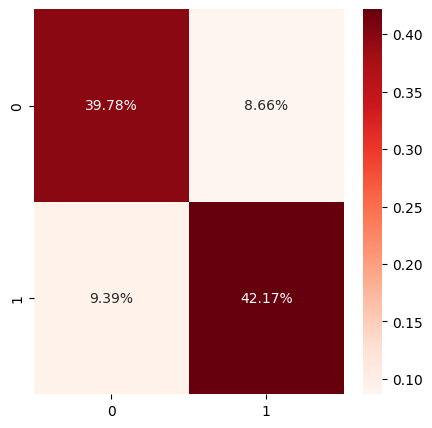

In [119]:
from sklearn.tree import DecisionTreeClassifier
# Creating model object
model_dt = DecisionTreeClassifier( max_depth=4, random_state=42)
# Training Model
model_dt.fit(X_train,y_train)
DecisionTreeClassifier(max_depth=4, random_state=42)

# Making Prediction
pred_dt = model_dt.predict(X_test)

# Calculating Accuracy Score
dt = accuracy_score(y_test, pred_dt)
print(dt)
print(classification_report(y_test,pred_dt))

# confusion Maxtrix
cm4 = confusion_matrix(y_test, pred_dt)
sns.heatmap(cm4/np.sum(cm4), annot = True, fmt=  '0.2%', cmap = 'Reds')

,Model,Accuracy_score
3,Decision Tree,0.819521
0,SVM,0.753223
2,Random Forest,0.745856
1,Logistic Regression,0.714549


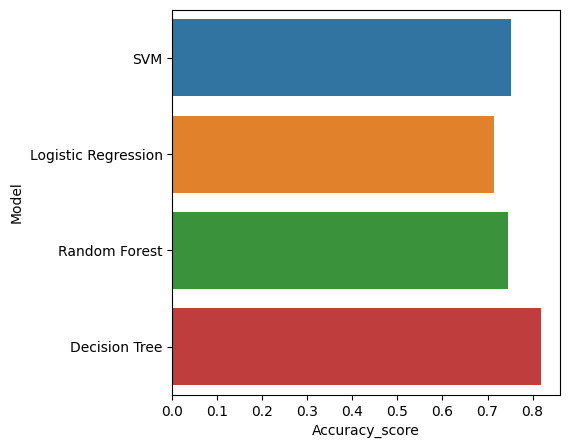

In [120]:
models = pd.DataFrame({
    'Model': ['SVM','Logistic Regression', 'Random Forest', 'Decision Tree'],
    'Accuracy_score' :[sv, lg, rf, dt] 
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)
models.sort_values(by='Accuracy_score', ascending=False)